<a href="https://colab.research.google.com/github/ElgunBabayev1/Machine-Learning/blob/main/training_linear_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import numpy as np

np.random.seed(42)
m=100
X=2*np.random.rand(m,1)
y=4+3*X+np.random.randn(m,1)

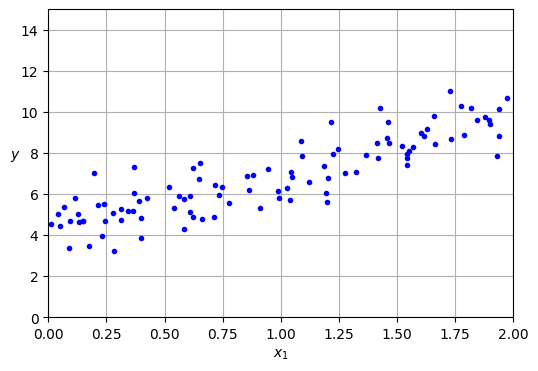

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(X,y,"b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$",rotation=0)
plt.axis([0,2,0,15])
plt.grid();

In [ ]:
import numpy as np

#Creating 2 matrices
matrix_a=np.array([[1,2],[3,4]])
matrix_b=np.array([[5,6],[7,8]])

#Testing matrix multiplication using @
result=matrix_a @ matrix_b
result1=np.dot(matrix_a,matrix_b)

print("Matrix A: ")
print(matrix_a)
print("Matrix B: ")
print(matrix_b)
print("Multiplication with @: ")
print(result)
print("Multiplication with dot: ")
print(result1)

Matrix A: 
[[1 2]
 [3 4]]
Matrix B: 
[[5 6]
 [7 8]]
Multiplication with @: 
[[19 22]
 [43 50]]
Multiplication with dot: 
[[19 22]
 [43 50]]


In [ ]:
from sklearn.preprocessing import add_dummy_feature

X_b=add_dummy_feature(X)

theta_best=np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

In [ ]:
theta_best

array([[4.21509616],
       [2.77011339]])

In [ ]:
X_new=np.array([[0],[2]])
X_new_b=add_dummy_feature(X_new)
y_predict=X_new_b @ theta_best
y_predict

array([[4.21509616],
       [9.75532293]])

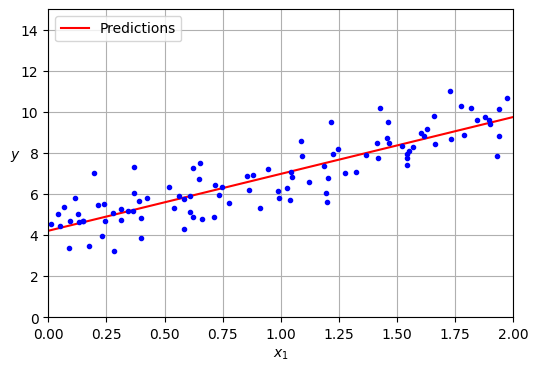

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(X_new,y_predict,"r-",label="Predictions")
plt.plot(X,y,"b.")

plt.xlabel("$x_1$")
plt.ylabel("$y$",rotation=0)
plt.axis([0,2,0,15])
plt.grid()
plt.legend(loc="upper left")
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg=LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [ ]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

#Gradient Descent

In [ ]:
eta=0.1 #learning rate
n_epochs=1000
m=len(X_b) # number of instances
np.random.seed(42)
theta=np.random.randn(2,1) # randomly initialized model parameters

for epoch in range(n_epochs):
  gradients=1/m*2*X_b.T @ (X_b @ theta - y)
  theta=theta-eta*gradients

In [ ]:
theta

array([[4.21509616],
       [2.77011339]])

In [ ]:
y.shape

(100, 1)

#Stochastic Gradient Descent

In [ ]:
np.random.seed(42)
eta=0.1
theta=np.random.randn(2,1)

for epoch in range(n_epochs):
  for iteration in range(m):
    random_index=np.random.randint(m)
    xi=X_b[random_index:random_index+1]
    yi=y[random_index:random_index+1]
    gradients=2*xi.T@(xi@theta-yi)
    theta=theta-eta*gradients

In [ ]:
theta

array([[4.17686315],
       [2.85986577]])

In [ ]:
from sklearn.linear_model import SGDRegressor

sgd_reg=SGDRegressor(max_iter=1000,tol=0.00001,eta0=0.01,n_iter_no_change=100,random_state=42)
sgd_reg.fit(X,y.ravel()) #y.ravel() because fit() expects 1D targets

SGDRegressor(n_iter_no_change=100, random_state=42, tol=1e-05)

In [ ]:
sgd_reg.intercept_,sgd_reg.coef_

(array([4.21353251]), array([2.77191196]))

#Mini-batch gradient descent

In [ ]:
from math import ceil

n_epoch=50
eta=0.1
m=len(X_b)
minibatch_size=20
n_batches_per_epoch=ceil(m/minibatch_size)

np.random.seed(42)
theta=np.random.randn(2,1)

for epoch in range(n_epochs):
  shuffled_indices=np.random.permutation(m)
  X_b_shuffled=X_b[shuffled_indices]
  y_shuffled=y[shuffled_indices]
  for iteration in range(0, n_batches_per_epoch):
    idx=iteration*minibatch_size
    xi=X_b_shuffled[idx:idx+minibatch_size]
    yi=y_shuffled[idx:idx+minibatch_size]
    gradients=2/minibatch_size*xi.T@(xi @ theta-yi)
    theta=theta-eta*gradients

In [ ]:
theta

array([[4.19811521],
       [2.75356112]])

#Polynomial Regression

In [ ]:
np.random.seed(42)
m=100
X=6*np.random.rand(m,1)-3
y=0.5*X**2+X+2+np.random.randn(m,1)

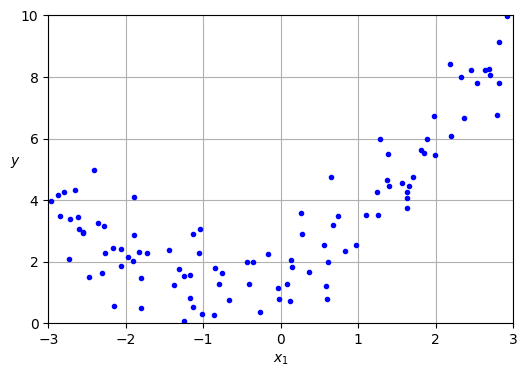

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(X,y,'b.')
plt.xlabel('$x_1$')
plt.ylabel('$y$',rotation=0)
plt.axis([-3,3,0,10])
plt.grid()
plt.show()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_features=PolynomialFeatures(degree=2,include_bias=False)
X_poly=poly_features.fit_transform(X)
X[0],X_poly[0]

(array([-0.75275929]), array([-0.75275929,  0.56664654]))

In [ ]:
X_new=np.linspace(-3,3,100).reshape(100,1)
X_new_poly=poly_features.transform(X_new)
model = LinearRegression()
model.fit(X_poly, y)
model.score(X_poly,y)

0.8525067519009746

In [ ]:
y_new=model.predict(X_new_poly)

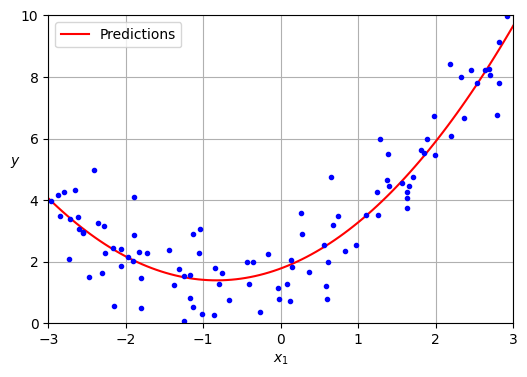

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(X_new,y_new,"r-",label="Predictions")
plt.plot(X,y,"b.")

plt.xlabel("$x_1$")
plt.ylabel("$y$",rotation=0)
plt.axis([-3,3,0,10])
plt.grid()
plt.legend(loc="upper left")
plt.show()

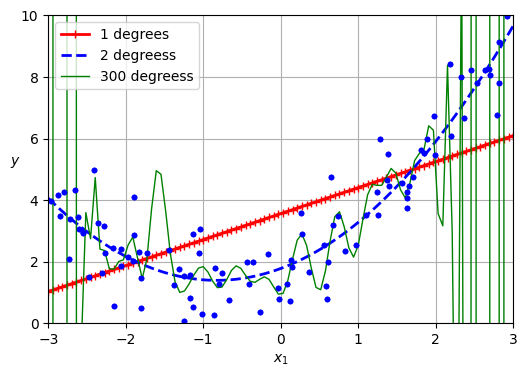

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

plt.figure(figsize=(6,4))

for style,width,degree in (("r-+",2,1),("b--",2,2),("g-",1,300)):
  polybig_features=PolynomialFeatures(degree=degree,include_bias=False)
  std_scaler=StandardScaler()
  lin_reg=LinearRegression()
  polynomial_regression=make_pipeline(polybig_features,std_scaler,lin_reg)
  polynomial_regression.fit(X,y)
  y_newbig=polynomial_regression.predict(X_new)
  label=f"{degree} degrees{'s'if degree>1 else ''}"
  plt.plot(X_new,y_newbig,style,label=label,linewidth=width)

  plt.plot(X,y,"b.",linewidth=3)
  plt.legend(loc="upper left")
  plt.xlabel("$x_1$")
  plt.ylabel("$y$",rotation=0)
  plt.axis([-3,3,0,10])
  plt.grid()

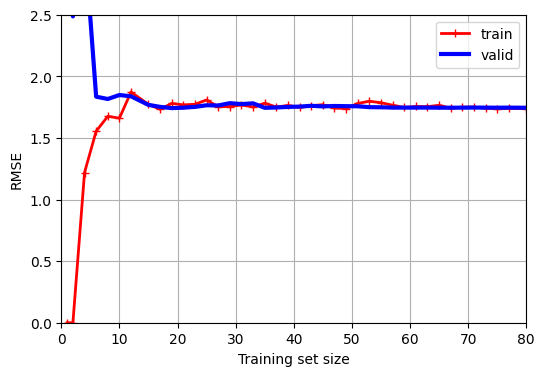

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores=learning_curve(LinearRegression(),X,y,train_sizes=np.linspace(0.01,1.0,40),cv=5,scoring='neg_root_mean_squared_error')

train_errors=-train_scores.mean(axis=1)
valid_errors=-valid_scores.mean(axis=1)

plt.figure(figsize=(6,4))
plt.plot(train_sizes,train_errors,"r-+",linewidth=2,label="train")
plt.plot(train_sizes,valid_errors,"b-",linewidth=3,label="valid")

plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()
plt.legend(loc="upper right")
plt.axis([0,80,0,2.5])

plt.show()

In [ ]:
from sklearn.pipeline import make_pipeline

polynomial_regression= make_pipeline(
    PolynomialFeatures(degree=10,include_bias=False),
    LinearRegression()
)

train_sizes,train_scores,valid_scores=learning_curve(
    polynomial_regression,X,y,train_sizes=np.linspace(0.01,1.0,40),cv=5,scoring="neg_root_mean_squared_error"
)

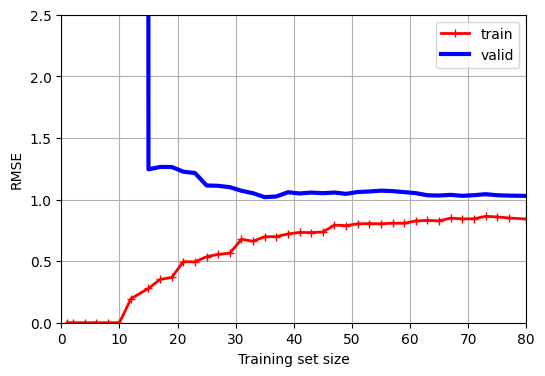

In [ ]:
train_errors=-train_scores.mean(axis=1)
valid_errors=-valid_scores.mean(axis=1)

plt.figure(figsize=(6,4))
plt.plot(train_sizes,train_errors,"r-+",linewidth=2,label="train")
plt.plot(train_sizes,valid_errors,"b-",linewidth=3,label="valid")

plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()
plt.legend(loc="upper right")
plt.axis([0,80,0,2.5])

plt.show()

#Regularized Linear Models

#Ridge Regression

In [ ]:
np.random.seed(42)
m=20
X=3*np.random.rand(m,1)
y=1+0.5*X+np.random.randn(m,1)/1.5
X_new=np.linspace(0,3,100).reshape(100,1)

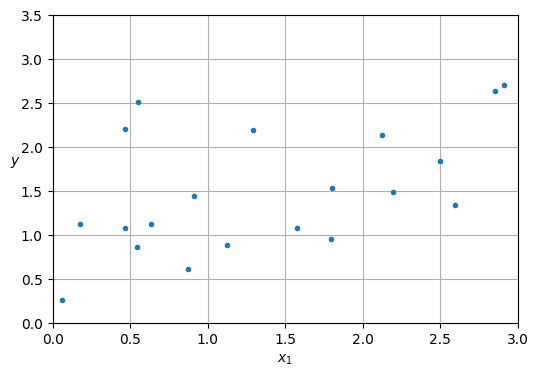

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(X,y,".")
plt.xlabel("$x_1$")
plt.ylabel("$y$",rotation=0)
plt.axis([0,3,0,3.5])
plt.grid();

In [ ]:
from sklearn.linear_model import Ridge # l2 regularization

ridge_reg=Ridge(alpha=0.1,solver="cholesky")
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[1.55325833]])

In [ ]:
sgd_reg=SGDRegressor(penalty="l2",max_iter=1000,eta0=0.01,random_state=42)
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

array([1.47012588])

In [ ]:
ridge_reg=Ridge(alpha=0.1,solver="sag",random_state=42)
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[1.55326019]])

#Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso #l1 regularization

lasso_reg=Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([1.53788174])

#Elastic Net

In [ ]:
from sklearn.linear_model import ElasticNet

elastic_net=ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([1.54333232])

#Decision Boundaries

In [ ]:
from sklearn.datasets import load_iris

iris=load_iris(as_frame=True)
list(iris)

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [ ]:
iris.data.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [ ]:
iris.target.head(3)

0    0
1    0
2    0
Name: target, dtype: int64

In [ ]:
iris.target

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X=iris.data[["petal width (cm)"]].values
y=iris.target
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)
log_reg=LogisticRegression(random_state=42)
log_reg.fit(X_train,y_train)

LogisticRegression(random_state=42)

In [ ]:
X_train[:3]

array([[0.2],
       [0.1],
       [1.9]])

In [ ]:
log_reg.score(X_test,y_test)

1.0